## CREATED BY HCY 20200720 22:44
## BACKGROUND Kaggle Bank Customer Satisfaction TEST

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold


## 配置gpu使用，防止gpu内存不够用报错
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
VarianceThreshold??

In [3]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

fatal: destination path 'Data-Files-for-Feature-Selection' already exists and is not an empty directory.


In [4]:
data = pd.read_csv('./Data-Files-for-Feature-Selection/santander-train.csv')
data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
data.shape

(76020, 371)

In [6]:
X = data.drop(columns=['ID', 'TARGET'])
print(X.shape)

(76020, 369)


In [7]:
y  =data['TARGET']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [9]:
print(X_train.shape, X_test.shape)

(60816, 369) (15204, 369)


In [10]:
## VarianceThreshold去除方差小于阈值的变量
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train = constant_filter.transform(X_train)
X_test = constant_filter.transform(X_test)
print(X_train.shape, X_test.shape)

(60816, 273) (15204, 273)


In [11]:
X_train_T = X_train.T
X_test_T = X_test.T

In [12]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)
print(X_train_T.shape, X_test_T.shape)

(273, 60816) (273, 15204)


In [13]:
X_train_T.duplicated().sum()

17

In [14]:
X_train_T.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [15]:
X_train_T

,0,1,2,3,4,5,6,7,8,9,...,60806,60807,60808,60809,60810,60811,60812,60813,60814,60815
0,2.000000,2.00,2.00,2.00,2.0,2.00,2.00,2.00,2.000000,2.00,...,2.000000,2.00,2.00,2.00,2.000000,2.0,2.00,2.00,2.000000,2.000000
1,26.000000,23.00,23.00,30.00,23.0,22.00,23.00,25.00,66.000000,24.00,...,23.000000,24.00,26.00,44.00,58.000000,23.0,36.00,41.00,31.000000,37.000000
2,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.00,0.00,225.000000,0.0,0.00,0.00,0.000000,12600.000000
3,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.00,2399.04,2870.670000,0.0,0.00,0.00,0.000000,0.000000
4,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.00,2399.04,3323.580000,0.0,0.00,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000
269,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000
270,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000
271,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000


In [16]:
dupl_features = X_train_T.duplicated()
dupl_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [17]:
features_to_keep = [not index for index in dupl_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [18]:
X_train = X_train_T[features_to_keep].T
X_test = X_test_T[features_to_keep].T

In [19]:
print(X_train.shape, X_test.shape)

(60816, 256) (15204, 256)


In [20]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48888.000000
60812,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55244.850000
60813,2.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75404.010000
60814,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(60816, 256)

In [23]:
X_test.shape

(15204, 256)

In [24]:
X_train = X_train.reshape(60816, 256, 1)
X_test = X_test.reshape(15204, 256, 1)

In [25]:
Conv1D??

In [26]:
MaxPool1D??

In [27]:
Dense??

In [28]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(256, 1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [30]:
from tensorflow.keras.optimizers import Adam

In [31]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
history = model.fit(X_train, y_train.to_numpy(), validation_data=(X_test, y_test.to_numpy()), batch_size=20, verbose=1, epochs=10)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 28s 465us/sample - loss: 0.2149 - accuracy: 0.9530 - val_loss: 0.1724 - val_accuracy: 0.9603
Epoch 2/10
60816/60816 [==============================] - 26s 433us/sample - loss: 0.1727 - accuracy: 0.9598 - val_loss: 0.1745 - val_accuracy: 0.9602
Epoch 3/10
60816/60816 [==============================] - 27s 437us/sample - loss: 0.1663 - accuracy: 0.9603 - val_loss: 0.1699 - val_accuracy: 0.9604
Epoch 4/10
60816/60816 [==============================] - 27s 440us/sample - loss: 0.1638 - accuracy: 0.9604 - val_loss: 0.1657 - val_accuracy: 0.9604
Epoch 5/10
60816/60816 [==============================] - 27s 441us/sample - loss: 0.1617 - accuracy: 0.9604 - val_loss: 0.1640 - val_accuracy: 0.9600
Epoch 6/10
60816/60816 [==============================] - 27s 441us/sample - loss: 0.1590 - accuracy: 0.9604 - val_loss: 0.1638 - val_accuracy: 0.9604
Epoch 7/10
60816/60816 [====================

In [35]:
history.history

{'loss': [0.21487731535360854,
  0.172731867447075,
  0.1662509571869927,
  0.1637824479573458,
  0.16172797605615835,
  0.1590339902552446,
  0.15618175359663838,
  0.15386691384741014,
  0.15262222998203173,
  0.15167517784973855],
 'accuracy': [0.95298934,
  0.9598296,
  0.96033937,
  0.9603558,
  0.9604052,
  0.9604052,
  0.960438,
  0.960438,
  0.960438,
  0.960438],
 'val_loss': [0.1723805881293784,
  0.17446564152440847,
  0.169856851122209,
  0.1656578291566262,
  0.16402376053467202,
  0.16383444179918727,
  0.16101820272768652,
  0.15914322493239647,
  0.15955077295094314,
  0.1555407178666373],
 'val_accuracy': [0.96033937,
  0.9602078,
  0.9604052,
  0.9604052,
  0.9600105,
  0.9604052,
  0.9604052,
  0.96033937,
  0.9604052,
  0.9604052]}

In [39]:
def plot_learningCureve(history):
    epoch_range = range(1, 11)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

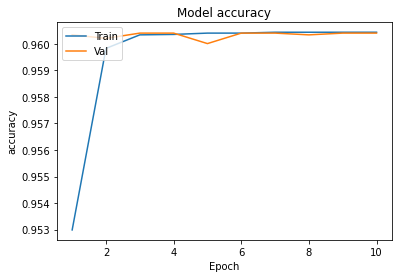

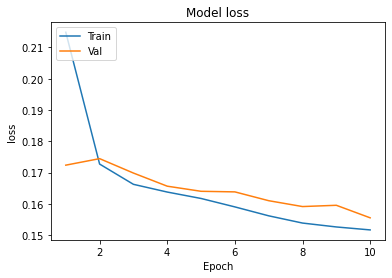

In [40]:
plot_learningCureve(history)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score??

In [43]:
accuracy_score(y_test, model.predict_classes(X_test))

0.9604051565377533

In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix??

In [48]:
mat = confusion_matrix(y_test, model.predict_classes(X_test))

In [50]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19788d24f28>)

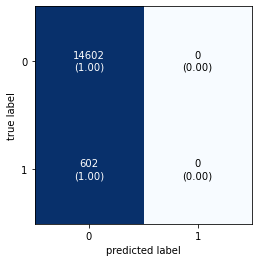

In [52]:
plot_confusion_matrix(mat, show_normed=True)

In [53]:
y_train.value_counts()

0    58410
1     2406
Name: TARGET, dtype: int64

In [54]:
58410 / (58410+2406)

0.960438042620363